<a href="https://colab.research.google.com/github/AvantiShri/colab_notebooks/blob/master/misc_examples/SimulateImpScores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install modisco

     |████████████████████████████████| 215 kB 5.4 MB/s 
     |████████████████████████████████| 1.4 MB 38.5 MB/s 
     |████████████████████████████████| 3.2 MB 39.7 MB/s 
  Created wheel for modisco: filename=modisco-0.5.15.0-py3-none-any.whl size=231925 sha256=c58cba40c1bb0f3ed5edc97935db624a1a7706cd64760aee1d442ee8625fdcba
  Stored in directory: /root/.cache/pip/wheels/67/53/04/50094050522f2faf148096dd88651c1674c3c7a619a5c5377a
Successfully built modisco


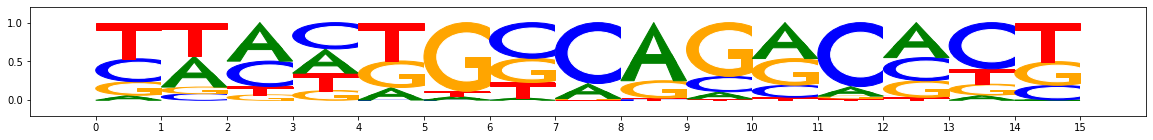

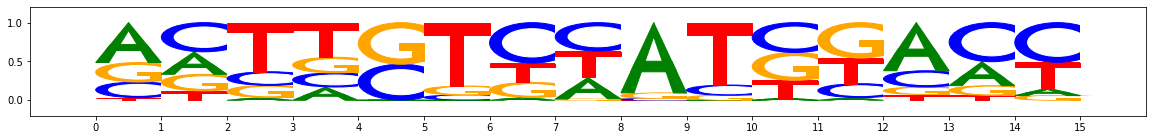

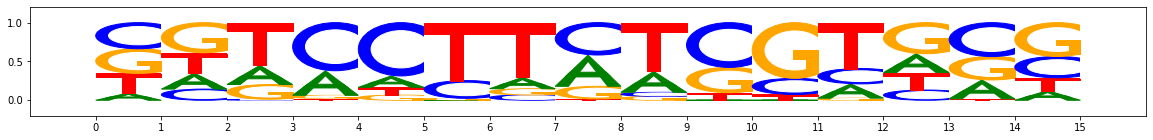

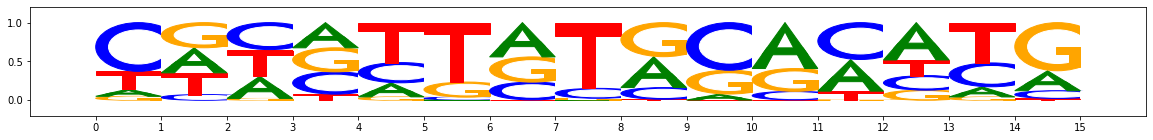

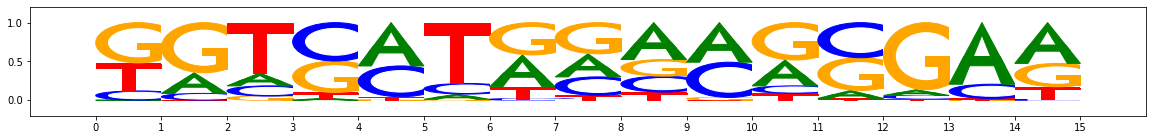

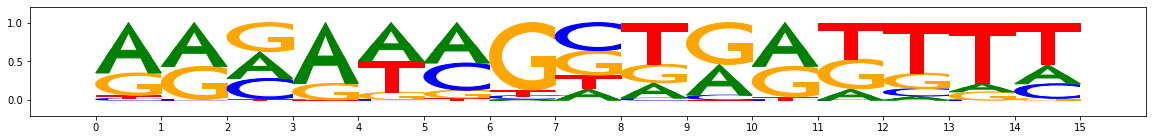

In [20]:
#motifs of varying lengths
#and of varying frequencies

import numpy as np
from modisco.visualization import viz_sequence

rng = np.random.RandomState(1234)

def generate_ppm(rng, length, alpha):
    return rng.dirichlet(alpha*np.ones(4), size=length)

motif1 = np.concatenate([generate_ppm(rng, length=5, alpha=1.0),
                         generate_ppm(rng, length=5, alpha=0.5),
                         generate_ppm(rng, length=5, alpha=1.0)])
viz_sequence.plot_weights(motif1)

motif2 = np.concatenate([generate_ppm(rng, length=4, alpha=1.0),
                         generate_ppm(rng, length=7, alpha=0.5),
                         generate_ppm(rng, length=4, alpha=1.0)])
viz_sequence.plot_weights(motif2)

motif3 = np.concatenate([generate_ppm(rng, length=3, alpha=1.0),
                         generate_ppm(rng, length=9, alpha=0.5),
                         generate_ppm(rng, length=3, alpha=1.0)])
viz_sequence.plot_weights(motif3)

motif4 = np.concatenate([generate_ppm(rng, length=2, alpha=1.0),
                         generate_ppm(rng, length=11, alpha=0.7),
                         generate_ppm(rng, length=2, alpha=1.0)])
viz_sequence.plot_weights(motif4)

motif5 = np.concatenate([generate_ppm(rng, length=1, alpha=1.0),
                         generate_ppm(rng, length=13, alpha=0.7),
                         generate_ppm(rng, length=1, alpha=1.0)])
viz_sequence.plot_weights(motif5)

motif6 = np.concatenate([generate_ppm(rng, length=5, alpha=0.5),
                         generate_ppm(rng, length=5, alpha=1.0),
                         generate_ppm(rng, length=5, alpha=0.5)])
viz_sequence.plot_weights(motif6)

In [2]:
!pip uninstall -y simdna
%cd /content/
!rm -rf simdna
!git clone https://github.com/kundajelab/simdna.git
%cd /content/simdna
!git checkout dev
!git log -1
!pip install .
%cd /content/

from importlib import reload
%load_ext autoreload
%autoreload 2

Found existing installation: simdna 0.5.0.0
Uninstalling simdna-0.5.0.0:
  Successfully uninstalled simdna-0.5.0.0
/content
Cloning into 'simdna'...
remote: Enumerating objects: 1224, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (233/233), done.
remote: Total 1224 (delta 159), reused 231 (delta 97), pack-reused 894
Receiving objects: 100% (1224/1224), 4.02 MiB | 10.63 MiB/s, done.
Resolving deltas: 100% (687/687), done.
/content/simdna
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'
commit ef8f53fdb9a9a30222af44a0e0bef7b7ec125fbd (HEAD -> dev, origin/dev)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Tue Sep 21 07:46:17 2021 -0700

    fixed the test
Processing /content/simdna
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this

In [21]:
motifs = [motif1, motif2, motif3, motif4, motif5, motif6]

In [42]:
#generate simulate sequences
from importlib import reload
import simdna
reload(simdna.synthetic.substringgen)
#reload(simdna.synthetic.embedders)
from simdna.simdnautil.pwm import PWM
import simdna.synthetic as sn
import simdna

rng = np.random.RandomState(1234)

simdnapwmembedders = [sn.SubstringEmbedder(sn.PwmSampler(
                       PWM(name="motif"+str(idx),probMatrix=motif,
                           pseudocountProb=0.0)),
                           positionGenerator=sn.InsideCentralBp(centralBp=200))
                      for idx,motif in enumerate(motifs)]
relative_probs = rng.dirichlet(alpha=np.ones(len(motifs))*5)
print("Motif relative probs:", relative_probs)
embedder = sn.RandomSubsetOfEmbedders(
              quantityGenerator=3, embedders=simdnapwmembedders,
              probs=relative_probs)
simulator = sn.EmbedInABackground(
    backgroundGenerator=sn.ZeroOrderBackgroundGenerator(
        seqLength=300,
        discreteDistribution={'A':0.27, 'C':0.23, 'G':0.23, 'T': 0.27}),
        embedders=[embedder])

sn.print_sequences(
    outputFileName="mysim.simdna",
    sequenceSetGenerator=sn.GenerateSequenceNTimes(simulator, N=1000),
    includeEmbeddings=True)

Motif relative probs: [0.23573248 0.10384039 0.13407845 0.28060085 0.19234588 0.05340196]


In [44]:
bgsimulator = sn.EmbedInABackground(
    backgroundGenerator=sn.ZeroOrderBackgroundGenerator(
        seqLength=300,
        discreteDistribution={'A':0.27, 'C':0.23, 'G':0.23, 'T': 0.27}),
        embedders=[])

sn.print_sequences(
    outputFileName="bgsim.simdna",
    sequenceSetGenerator=sn.GenerateSequenceNTimes(bgsimulator, N=1000),
    includeEmbeddings=True)

In [45]:
!ls

bgsim_info.txt	bgsim.simdna  mysim_info.txt  mysim.simdna  sample_data  simdna


In [46]:
simdata = sn.read_simdata_file("mysim.simdna")
bgdata = sn.read_simdata_file("bgsim.simdna")

In [47]:
seqs = simdata.sequences

#one-hot encode the seqs
import numpy as np
lookup = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1]}
def onehotencode_seqs(seqs):
  to_return = []
  for seq in seqs:
    to_return.append([lookup[letter] for letter in seq])
  return np.array(to_return)

fg_onehot_seqs = onehotencode_seqs(simdata.sequences)
bg_onehot_seqs = onehotencode_seqs(bgdata.sequences)

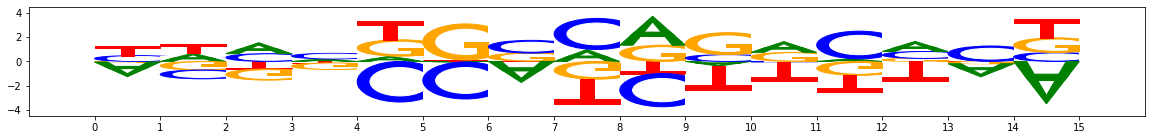

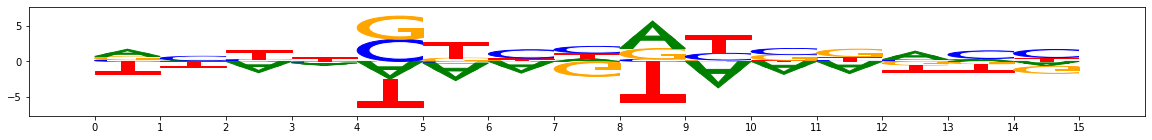

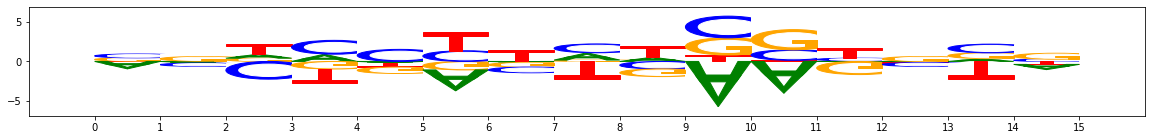

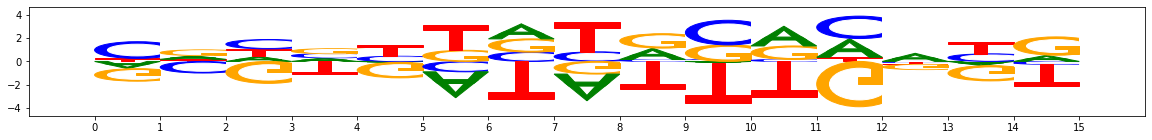

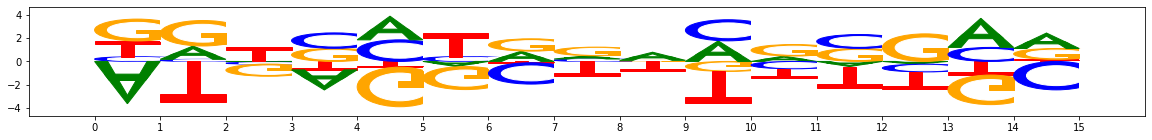

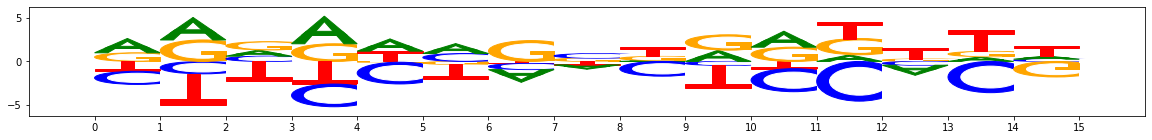

In [48]:
#score each sequence with the log-odds matrix of each pfm
background = np.array([0.27, 0.23, 0.23, 0.27])
pwms = [np.log(motif/background) for motif in motifs]
for pwm in pwms:
  viz_sequence.plot_weights(pwm - np.mean(pwm, axis=-1)[:,None])

In [49]:
#scan each sequence with the rolling window sums. 
import modisco
import numpy as np
import scipy
from collections import namedtuple


PwmHit = namedtuple("PwmHit", ["seq_idx", "pwm_start", "pwm_end", "which_pwm",
                                         "logodds_score"])


def get_pwm_hits_for_seq(seq_pwm_axis_argmax, seq_pwm_axis_maxlogodds,
                         pwm_offsets, pwm_lengths, competition_window,
                         seq_idx):
    #Greedily decide which motifs get to bind
    #Pwm offsets should be the left padding that was applied to the logodds
    # scores for that particular pwm (depends on the pwm length)
    #seq_idx just to insert into the hit
    maxlogodds_copy = np.copy(seq_pwm_axis_maxlogodds)
    
    pwm_hits = []
    while True:
        argmax_pos = np.argmax(maxlogodds_copy)
        logodds_score = maxlogodds_copy[argmax_pos]
        if (logodds_score <= 0): #avoid 'less likely than bg' hits for this sim
            break
        which_pwm = seq_pwm_axis_argmax[argmax_pos]
        #we want pwm_hits to represent the pwm start, hence the subtraction
        # of pwm_offsets
        pwm_start = argmax_pos-pwm_offsets[which_pwm]
        pwm_hits.append(PwmHit(seq_idx=seq_idx,
                               pwm_start=pwm_start,
                               pwm_end=pwm_start+pwm_lengths[which_pwm],
                               which_pwm=which_pwm,
                               logodds_score=logodds_score))
        clearance_start = argmax_pos - int(competition_window/2.0)
        clearance_end = clearance_start + competition_window
        maxlogodds_copy[clearance_start:clearance_end] = 0
    return pwm_hits


def scan_sequences(onehot_seqs, pwms):
  logodds_scans = []
  #pwm_scans = []
  for pwm in pwms:
    logodds_scans.append(modisco.util.compute_pwm_scan(onehot_seq=onehot_seqs,
                                                       weightmat=pwm))
    #pwm_scans.append( np.exp(expfactor*scipy.special.expit(logodds_scans[-1]+mu)) )
  return logodds_scans#, pwm_scans


def get_competitive_pwm_hits(onehot_seqs, pwms, competition_window):
    #Scan the sequences for logodds. Then:
    # (1) simulate competitive binding, in that only one motif is allowed to bind
    # in a window of length "competition_window" (centered at the motif)
    # (2) Decide which motif gets to bind greedily.
    
    logodds_scans = np.array(scan_sequences(onehot_seqs=onehot_seqs, pwms=pwms))
    pwm_lengths = [len(x) for x in pwms]

    #When a sequences is scanned,
    # the length of the result is orig_len-(windowlen-1). So we distribute
    # (windowlen-1) evenly on either side to make up for it.
    padded_logodds_scans = []
    pwm_offsets = [] #record the left-padding applied
    for (logodds_scan, pwm_len) in zip(logodds_scans, pwm_lengths):
      pwm_offset = int((pwm_len-1)/2.0)
      pwm_offsets.append(pwm_offset)
      padded_logodds_scans.append(
          np.pad(logodds_scan, (
            (0,0), (pwm_offset, (pwm_len-1)-pwm_offset )))
      )
    #assert that after padding they are all the same length. This will also make
    # the scores represent the score at the center of the pwm hit rather than
    # at the start.
    assert len(set(x.shape[1] for x in padded_logodds_scans)) == 1
    #make them all one numpy array so we can take an argmax over the pwm axis
    padded_logodds_scans = np.array(padded_logodds_scans)
    pwm_axis_argmax = np.argmax(padded_logodds_scans, axis=0)
    pwm_axis_maxlogodds = np.max(padded_logodds_scans, axis=0)
    allseq_pwm_hits = [
      get_pwm_hits_for_seq(seq_pwm_axis_argmax, seq_pwm_axis_maxlogodds,
                           pwm_offsets=pwm_offsets, pwm_lengths=pwm_lengths,
                           competition_window=competition_window,
                           seq_idx=seq_idx)
      for (seq_idx, (seq_pwm_axis_argmax, seq_pwm_axis_maxlogodds)) in
      enumerate(zip(pwm_axis_argmax, pwm_axis_maxlogodds))
    ]

    #reorganize to be pwm-to-hits
    pwm_to_hits = [[] for pwm in pwms]
    for seq_idx, pwm_hits_for_seq in enumerate(allseq_pwm_hits):
      for pwm_hit in pwm_hits_for_seq:
        pwm_to_hits[pwm_hit.which_pwm].append(pwm_hit)

    return allseq_pwm_hits, pwm_to_hits


COMPETITION_WINDOW = max([len(x) for x in pwms])

(fg_allseq_pwm_hits, fg_pwm_to_hits) = get_competitive_pwm_hits(
    onehot_seqs=fg_onehot_seqs, pwms=pwms,
    competition_window=COMPETITION_WINDOW)
(bg_allseq_pwm_hits, bg_pwm_to_hits) = get_competitive_pwm_hits(
    onehot_seqs=bg_onehot_seqs, pwms=pwms,
    competition_window=COMPETITION_WINDOW)

print("sumscore hits in fg")
print([np.sum([y.logodds_score for y in x]) for x in fg_pwm_to_hits])

print("sumscore hits in bg")
print([np.sum([y.logodds_score for y in x]) for x in bg_pwm_to_hits])

#for logodds_scan in fg_logodds_scans:
#  print(np.sum(logodds_scan+mu > 0)) #instances of "positive" hits
#print("hits in bg")
#for logodds_scan in bg_logodds_scans:
#  print(np.sum(logodds_scan+mu > 0)) #instances of "positive" hits

sumscore hits in fg
[10649.605499383466, 9944.81946485259, 11249.70181182556, 12623.647113967956, 9216.824175448588, 6907.9813168916335]
sumscore hits in bg
[7070.85098715238, 8853.035998935702, 10165.64193616008, 9752.629421198042, 5967.206851212717, 5825.2420727945355]


In [50]:

def logodds_to_score(logodds):
  MU = -4
  EXPFACTOR = 3
  return np.exp(EXPFACTOR*scipy.special.expit(logodds+MU))

def find_imp(onehot_seqs, allseq_pwm_hits, pwms):
    ref = logodds_to_score(0)
    simulated_hyp_scores = np.zeros_like(onehot_seqs, dtype="float64")
    for row_idx in range(len(allseq_pwm_hits)):
      for pwm_hit in allseq_pwm_hits[row_idx]:
        assert pwm_hit.seq_idx==row_idx
        score = logodds_to_score(pwm_hit.logodds_score)
        diff_from_ref = score-ref
        assert np.sign(diff_from_ref)==np.sign(pwm_hit.logodds_score)
        scalefactor = diff_from_ref/pwm_hit.logodds_score
        simulated_hyp_scores[row_idx][
            pwm_hit.pwm_start:pwm_hit.pwm_end]\
                += pwms[pwm_hit.which_pwm]*scalefactor
    simulated_actual_scores = simulated_hyp_scores*onehot_seqs
    return simulated_hyp_scores, simulated_actual_scores

fg_hyp_scores, fg_actual_scores = find_imp(onehot_seqs=fg_onehot_seqs,
                                           allseq_pwm_hits=fg_allseq_pwm_hits,
                                           pwms=pwms)

bg_hyp_scores, bg_actual_scores = find_imp(onehot_seqs=bg_onehot_seqs,
                                           allseq_pwm_hits=bg_allseq_pwm_hits,
                                           pwms=pwms)

fg


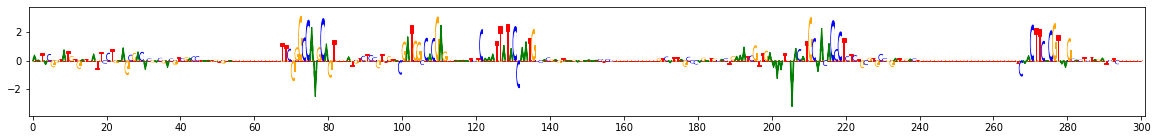

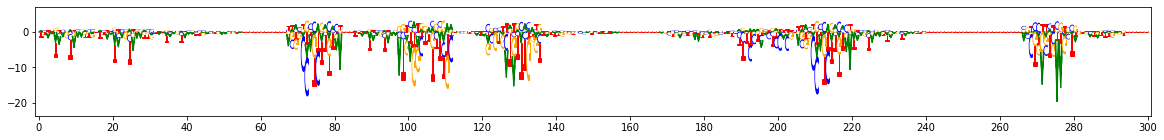

fg


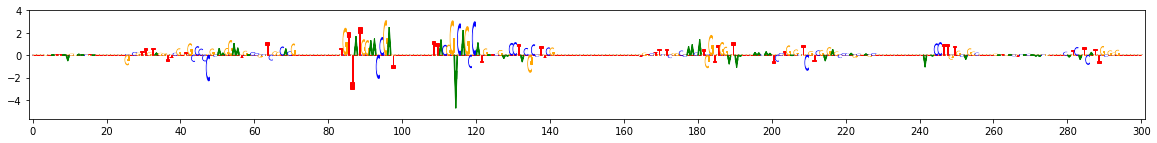

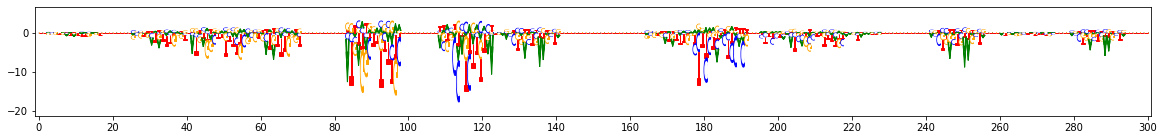

fg


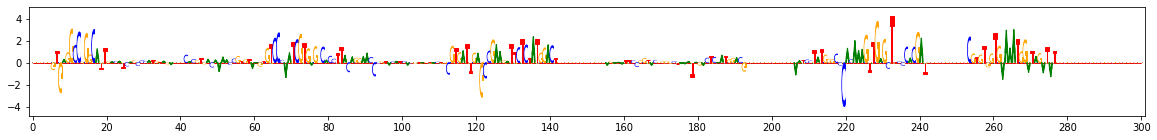

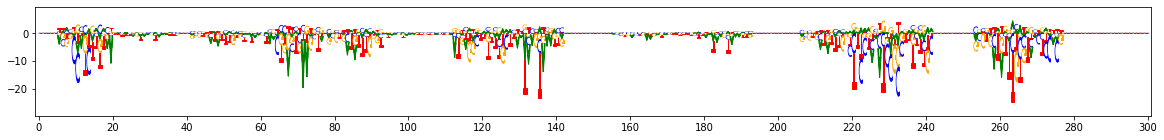

fg


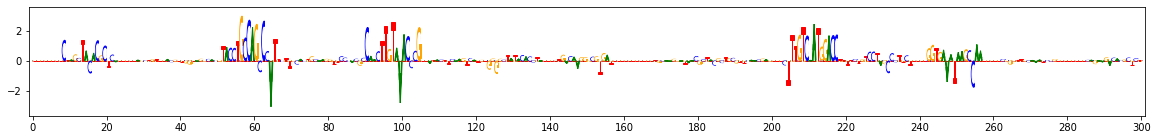

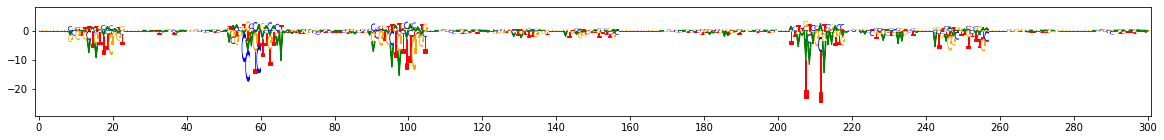

fg


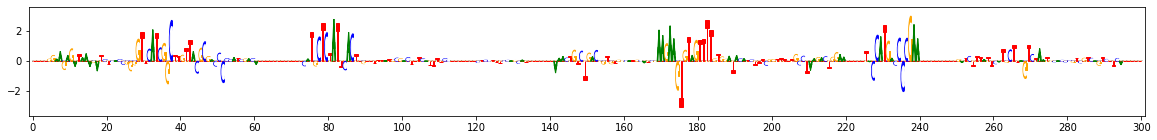

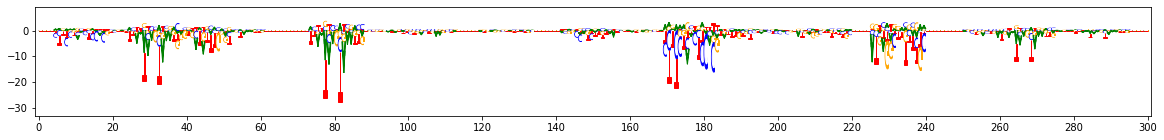

In [51]:
from modisco.visualization import viz_sequence

for i in range(5):
  print("fg")
  viz_sequence.plot_weights(fg_actual_scores[i], subticks_frequency=20)
  viz_sequence.plot_weights(fg_hyp_scores[i], subticks_frequency=20)
  #print("bg")
  #viz_sequence.plot_weights(bg_actual_scores[i], subticks_frequency=20)
  #viz_sequence.plot_weights(bg_hyp_scores[i], subticks_frequency=20)

In [ ]:
from modisco.core import SeqletCoordinates

#identify (centered) seqlet coordinates for each motif
seqlet_len = 21
pwm_seqlet_coords = [ [] for pwm in pwms]

for pwm_hits in fg_pwm_to_hits:
    for pwm_hit in pwm_hits:
        pwm_len = pwm_hit.pwm_end - pwm_hit.pwm_start
        left_flank = int((seqlet_len - pwm_len)/2.0)
        seqlet_start = pwm_hit.pwm_start - left_flank
        seqlet_end = seqlet_start + seqlet_len
        pwm_seqlet_coords[pwm_hit.which_pwm].append(
            SeqletCoordinates(example_idx=pwm_hit.seq_idx,
                              start=seqlet_start, end=seqlet_end,
                              is_revcomp=False))

#get the seqlets from the trackset object
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
              task_names=["task0"], contrib_scores={"task0": fg_actual_scores},
              hypothetical_contribs={"task0": fg_hyp_scores},
              one_hot=fg_onehot_seqs, revcomp=False)
pwm_seqlets = [track_set.create_seqlets(coords=coords)
               for coords in pwm_seqlet_coords]

# compute the pairwise sims using continjacc
def compute_pairwise_sims_continjacc(seqlets)
    pattern_comparison_settings =\                                          
                modisco.affinitymat.core.PatternComparisonSettings(                         
                    track_names=["task0_hypothetical_contribs",
                                "task0_contrib_scores"],                      
                    track_transformer=modisco.affinitymat.L1Normalizer(),                   
                    min_overlap=0.7)
    affmat_from_seqlets_with_nn_pairs =\                                    
        modisco.affinitymat.core.AffmatFromSeqletsWithNNpairs(                      
            pattern_comparison_settings=pattern_comparison_settings,        
            sim_metric_on_nn_pairs=\                                        
                modisco.affinitymat.core.ParallelCpuCrossMetricOnNNpairs(           
                    n_cores=10,                                   
                    cross_metric_single_region=                             
                        modisco.affinitymat.core.CrossContinJaccardSingleRegion()))
    return affmat_from_seqlets_with_nn_pairs(seqlets=seqlets)
all_seqlets = [y for x in pwm_seqlets for y in x]
seqlets_whichpwms = [i for i,x in enumerate(pwm_seqlets) for y in x]
pairwise_sims = compute_pairwise_sims_continjacc(all_seqlets)




In [ ]:
from matplotlib import pyplot as plt

# do the (two different) aff-to-dist mappings
# get t-sne emebdding, color points by ground-truth motif membership

invlogistic_distmat = modisco.affinitymat.AffToDistViaInvLogistic()(pairwise_sims)
invlogistic_embedding = sklearn.manifold.TSNE(                             
                perplexity=10,                                          
                metric='precomputed',                                           
                verbose=3, random_state=1234).fit_transform(invlogistic_distmat)
print("Invlogisitc tsne")
plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1],
            c=seqlets_whichpwms)

maxtomin_distmat = modisco.affinitymat.MaxToMin()(pairwise_sims)
maxtomin_embedding = sklearn.manifold.TSNE(                             
                perplexity=10,                                          
                metric='precomputed',                                           
                verbose=3, random_state=1234).fit_transform(maxtomin_distmat)
plt.scatter(maxtomin_embedding[:,0], maxtomin_embedding[:,1],
            c=seqlets_whichpwms)


In [ ]:
# run leiden with and without density embeddings


MEMORY 2.705354752
On task task0
Computing windowed sums on original
Generating null dist
Computing threshold
For increasing = True , the minimum IR precision was 0.39480844653872327 occurring at 0.0 implying a frac_neg of 0.6523693932618396
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.0 occurring at -5.581853761427169e-07 implying a frac_neg of 1.00000010000001e-07
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -7.554209057733011  and  17.835863705115415 with frac passing 0.050742857142857145
Passing windows frac was 0.050742857142857145 , which is below  0.2 ; adjusting
Final raw thresholds are -10.350701609033237  and  10.350701609033237
Final transformed thresholds are -0.8  and  0.8


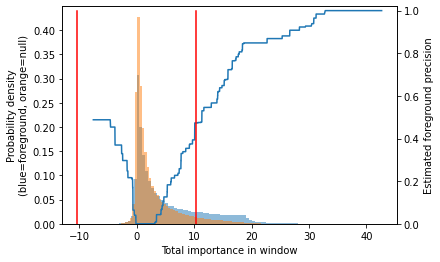

Got 3070 coords
After resolving overlaps, got 3070 seqlets
Across all tasks, the weakest transformed threshold used was: 0.7999
MEMORY 2.711908352
3070 identified in total
Reducing weak_threshold_for_counting_sign to match weakest_transformed_thresh, from 0.8 to 0.7999
1 activity patterns with support >= 100 out of 2 possible patterns
Metacluster sizes:  [3070]
Idx to activities:  {0: '1'}
MEMORY 2.711908352
On metacluster 0
Metacluster size 3070
Relevant tasks:  ('task0',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 3070
(Round 1) Computing coarse affmat
MEMORY 2.711908352
Beginning embedding computation
MEMORY 2.711908352


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.6s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   21.3s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   42.9s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 3070 out of 3070 | elapsed:  4.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3070 out of 3070 | elapsed:   11.1s finished


Constructing csr matrix...
csr matrix made in 0.886418342590332 s
Finished embedding computation in 302.83 s
MEMORY 3.015077888
Starting affinity matrix computations
MEMORY 3.01377536
Batching in slices of size 3070


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]

Finished affinity matrix computations in 2.35 s
MEMORY 3.074945024


(Round 1) Computed coarse affmat
MEMORY 3.073634304
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 3.073634304
Launching nearest neighbors affmat calculation job
MEMORY 3.073634304
Parallel runs completed
MEMORY 3.073425408
Job completed in: 208.63 s
MEMORY 3.073425408
(Round 1) Computed affinity matrix on nearest neighbors in 209.29 s
MEMORY 3.073163264
Filtered down to 3000 of 3070
(Round 1) Retained 3000 rows out of 3070 after filtering
MEMORY 3.073163264
(Round 1) Computing density adapted affmat
MEMORY 3.073163264
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 3.078295552
Beginning preprocessing + Leiden
Affmat shape: 3000


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  1.5min


Quality: 0.6039391889054337
Got 6 clusters after round 1
Counts:
{1: 583, 2: 581, 0: 672, 5: 333, 3: 432, 4: 399}
MEMORY 2.889682944
(Round 1) Aggregating seqlets in each cluster
MEMORY 2.889682944
Aggregating for cluster 0 with 672 seqlets
MEMORY 2.889682944


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:  2.0min finished


Skipped 1 seqlets that went over the sequence edge during flank expansion
Skipped 27 seqlets that went over sequence edge during flank expansion
Skipped 2 due to duplicates
Trimming eliminated 0 seqlets out of 642
Skipped 15 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 1 with 583 seqlets
MEMORY 2.888925184
Skipped 1 seqlets that went over the sequence edge during flank expansion
Skipped 39 seqlets that went over sequence edge during flank expansion
Skipped 4 due to duplicates
Trimming eliminated 0 seqlets out of 539
Skipped 15 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 2 with 581 seqlets
MEMORY 2.888925184
Skipped 31 seqlets that went over sequence edge during flank expansion
Skipped 2 due to duplicates
Trimming eliminated 0 seqlets out of 548
Skipped 16 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 3 with 432 seqlets
MEMORY 2.888925184
Skipped 3 seqlets tha

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    3.6s
[Parallel(n_jobs=10)]: Done 210 tasks      | elapsed:   16.1s
[Parallel(n_jobs=10)]: Done 460 tasks      | elapsed:   35.3s
[Parallel(n_jobs=10)]: Done 810 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 1260 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 1810 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 2460 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 2681 out of 2681 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2681 out of 2681 | elapsed:    9.9s finished


Constructing csr matrix...
csr matrix made in 0.7744221687316895 s
Finished embedding computation in 215.75 s
MEMORY 3.03106048
Starting affinity matrix computations
MEMORY 3.03106048
Batching in slices of size 2681


100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

Finished affinity matrix computations in 1.96 s
MEMORY 3.268603904


(Round 2) Computed coarse affmat
MEMORY 3.266039808
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 3.266039808
Launching nearest neighbors affmat calculation job
MEMORY 3.266039808
Parallel runs completed
MEMORY 3.268235264
Job completed in: 269.78 s
MEMORY 3.26797312
(Round 2) Computed affinity matrix on nearest neighbors in 270.43 s
MEMORY 3.26797312
Not applying filtering for rounds above first round
MEMORY 3.26797312
(Round 2) Computing density adapted affmat
MEMORY 3.26797312
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 2) Computing clustering
MEMORY 3.273211904
Beginning preprocessing + Leiden
Affmat shape: 2681


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  1.4min


Quality: 0.5383756100639489
Got 6 clusters after round 2
Counts:
{0: 637, 4: 343, 1: 541, 3: 361, 5: 284, 2: 515}
MEMORY 3.273211904
(Round 2) Aggregating seqlets in each cluster
MEMORY 3.273211904
Aggregating for cluster 0 with 637 seqlets
MEMORY 3.273211904


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:  1.9min finished


Skipped 2 seqlets that went over sequence edge during flank expansion
Skipped 23 due to duplicates
Trimming eliminated 0 seqlets out of 612
Skipped 15 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 1 with 541 seqlets
MEMORY 3.273211904
Skipped 3 seqlets that went over sequence edge during flank expansion
Skipped 16 due to duplicates
Trimming eliminated 0 seqlets out of 522
Skipped 20 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 2 with 515 seqlets
MEMORY 3.273211904
Skipped 1 seqlets that went over the sequence edge during flank expansion
Skipped 18 due to duplicates
Trimming eliminated 0 seqlets out of 496
Skipped 6 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 3 with 361 seqlets
MEMORY 3.273211904
Skipped 2 seqlets that went over sequence edge during flank expansion
Skipped 12 due to duplicates
Trimming eliminated 0 seqlets out of 347
Skipped 10 seqlets that we

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 597 out of 597 | elapsed:    3.2s finished


[t-SNE] Computed conditional probabilities for sample 597 / 597
[t-SNE] Mean sigma: 0.287709
Beginning preprocessing + Leiden
Affmat shape: 597


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   17.3s


Quality: 0.3568018873775321
Quality: 0.3604921989852563
Got subclusters: Counter({0: 162, 1: 104, 2: 101, 3: 95, 4: 39, 5: 37, 6: 27, 7: 19, 8: 9, 9: 4})
On merging iteration 1


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   28.0s finished


Numbers for each pattern pre-subsample: [162, 104, 101, 95, 39, 37, 27, 19, 9, 4]
Numbers after subsampling: [162, 104, 101, 95, 39, 37, 27, 19, 9, 4]
Computing sims for pattern 0
Computed sims for pattern 0 in 5.950387001037598 s
Computing sims for pattern 1
Computed sims for pattern 1 in 3.5754337310791016 s
Computing sims for pattern 2
Computed sims for pattern 2 in 3.3478329181671143 s
Computing sims for pattern 3
Computed sims for pattern 3 in 4.197338104248047 s
Computing sims for pattern 4
Computed sims for pattern 4 in 1.66251802444458 s
Computing sims for pattern 5
Computed sims for pattern 5 in 1.577019214630127 s
Computing sims for pattern 6
Computed sims for pattern 6 in 1.1432595252990723 s
Computing sims for pattern 7
Computed sims for pattern 7 in 0.8013718128204346 s
Computing sims for pattern 8
Computed sims for pattern 8 in 0.42531752586364746 s
Computing sims for pattern 9
Computed sims for pattern 9 in 0.2358541488647461 s
Cluster sizes
[162 104 101  95  39  37  27 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 502 out of 502 | elapsed:    2.1s finished


[t-SNE] Computed conditional probabilities for sample 502 / 502
[t-SNE] Mean sigma: 0.292105
Beginning preprocessing + Leiden
Affmat shape: 502


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   15.9s


Quality: 0.3433830072016286
Quality: 0.34437613080135787
Quality: 0.3445748447834179
Quality: 0.3447182307069619
Quality: 0.3448788077502969
Quality: 0.3450121143496867
Got subclusters: Counter({0: 114, 1: 98, 2: 88, 3: 61, 4: 38, 5: 32, 6: 31, 7: 18, 8: 13, 9: 6, 10: 3})
On merging iteration 1


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   22.4s finished


Numbers for each pattern pre-subsample: [114, 98, 88, 61, 38, 32, 31, 18, 13, 6, 3]
Numbers after subsampling: [114, 98, 88, 61, 38, 32, 31, 18, 13, 6, 3]
Computing sims for pattern 0
Computed sims for pattern 0 in 4.3420538902282715 s
Computing sims for pattern 1
Computed sims for pattern 1 in 4.776182174682617 s
Computing sims for pattern 2
Computed sims for pattern 2 in 3.8282997608184814 s
Computing sims for pattern 3
Computed sims for pattern 3 in 2.130568742752075 s
Computing sims for pattern 4
Computed sims for pattern 4 in 1.6883842945098877 s
Computing sims for pattern 5
Computed sims for pattern 5 in 1.3884344100952148 s
Computing sims for pattern 6
Computed sims for pattern 6 in 1.3455696105957031 s
Computing sims for pattern 7
Computed sims for pattern 7 in 0.781947135925293 s
Computing sims for pattern 8
Computed sims for pattern 8 in 0.580679178237915 s
Computing sims for pattern 9
Computed sims for pattern 9 in 0.31555747985839844 s
Computing sims for pattern 10
Computed

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 490 out of 490 | elapsed:    1.9s finished


[t-SNE] Computed conditional probabilities for sample 490 / 490
[t-SNE] Mean sigma: 0.289409
Beginning preprocessing + Leiden
Affmat shape: 490


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   13.9s


Quality: 0.3271769182928657
Quality: 0.3298578754727891
Quality: 0.33210094363853804
Quality: 0.33259127653862985
Quality: 0.3327959915390995
Got subclusters: Counter({0: 111, 1: 110, 2: 95, 3: 63, 4: 38, 5: 34, 6: 23, 7: 9, 8: 7})
On merging iteration 1


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   22.1s finished


Numbers for each pattern pre-subsample: [111, 110, 95, 63, 38, 34, 23, 9, 7]
Numbers after subsampling: [111, 110, 95, 63, 38, 34, 23, 9, 7]
Computing sims for pattern 0
Computed sims for pattern 0 in 3.445038080215454 s
Computing sims for pattern 1
Computed sims for pattern 1 in 3.3627867698669434 s
Computing sims for pattern 2
Computed sims for pattern 2 in 3.82507586479187 s
Computing sims for pattern 3
Computed sims for pattern 3 in 1.8402578830718994 s
Computing sims for pattern 4
Computed sims for pattern 4 in 1.3734893798828125 s
Computing sims for pattern 5
Computed sims for pattern 5 in 1.260101079940796 s
Computing sims for pattern 6
Computed sims for pattern 6 in 0.8623960018157959 s
Computing sims for pattern 7
Computed sims for pattern 7 in 0.3733859062194824 s
Computing sims for pattern 8
Computed sims for pattern 8 in 0.2999567985534668 s
Cluster sizes
[111 110  95  63  38  34  23   9   7]
Cross-contamination matrix:
[[1.   0.08 0.78 0.31 0.22 0.12 0.37 0.17 0.36]
 [1.  

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 337 out of 337 | elapsed:    1.1s finished


[t-SNE] Computed conditional probabilities for sample 337 / 337
[t-SNE] Mean sigma: 0.301324
Beginning preprocessing + Leiden
Affmat shape: 337


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   12.0s


Quality: 0.32515007977262794
Quality: 0.3266853735653354
Quality: 0.32896905789762715
Quality: 0.3289827841866772
Got subclusters: Counter({0: 86, 1: 82, 2: 75, 3: 45, 4: 25, 5: 11, 6: 9, 8: 2, 7: 2})
On merging iteration 1


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   16.9s finished


Numbers for each pattern pre-subsample: [86, 82, 75, 45, 25, 11, 9, 2, 2]
Numbers after subsampling: [86, 82, 75, 45, 25, 11, 9, 2, 2]
Computing sims for pattern 0
Computed sims for pattern 0 in 2.8172333240509033 s
Computing sims for pattern 1
Computed sims for pattern 1 in 2.6733713150024414 s
Computing sims for pattern 2
Computed sims for pattern 2 in 2.191213369369507 s
Computing sims for pattern 3
Computed sims for pattern 3 in 1.3012468814849854 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.8549189567565918 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.3926417827606201 s
Computing sims for pattern 6
Computed sims for pattern 6 in 0.35143470764160156 s
Computing sims for pattern 7
Computed sims for pattern 7 in 0.13406825065612793 s
Computing sims for pattern 8
Computed sims for pattern 8 in 0.1320793628692627 s
Cluster sizes
[86 82 75 45 25 11  9  2  2]
Cross-contamination matrix:
[[1.   1.   1.   1.   0.92 0.9  1.   1.   0.65]
 [0.04 1.   0.75

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 323 out of 323 | elapsed:    1.1s finished


[t-SNE] Computed conditional probabilities for sample 323 / 323
[t-SNE] Mean sigma: 0.305411
Beginning preprocessing + Leiden
Affmat shape: 323


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   11.1s


Quality: 0.31281475629296607
Quality: 0.31466199466917766
Quality: 0.3152337810436263
Quality: 0.3153181592518216
Got subclusters: Counter({0: 89, 1: 77, 2: 53, 3: 45, 4: 38, 5: 12, 6: 9})
On merging iteration 1


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   17.2s finished


Numbers for each pattern pre-subsample: [89, 77, 53, 45, 38, 12, 9]
Numbers after subsampling: [89, 77, 53, 45, 38, 12, 9]
Computing sims for pattern 0
Computed sims for pattern 0 in 2.3614232540130615 s
Computing sims for pattern 1
Computed sims for pattern 1 in 1.7919013500213623 s
Computing sims for pattern 2
Computed sims for pattern 2 in 1.2335708141326904 s
Computing sims for pattern 3
Computed sims for pattern 3 in 1.0145151615142822 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.9964590072631836 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.36455392837524414 s
Computing sims for pattern 6
Computed sims for pattern 6 in 0.24449896812438965 s
Cluster sizes
[89 77 53 45 38 12  9]
Cross-contamination matrix:
[[1.   0.04 0.36 0.09 0.6  0.01 0.17]
 [1.   1.   1.   0.85 1.   0.63 0.83]
 [1.   0.44 1.   0.49 0.96 0.29 0.51]
 [1.   0.8  1.   1.   1.   0.66 0.8 ]
 [0.97 0.21 0.64 0.24 1.   0.14 0.35]
 [0.49 0.38 0.57 0.43 0.61 1.   0.41]
 [0.69 0.34 0.6

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 254 out of 254 | elapsed:    0.8s finished


[t-SNE] Computed conditional probabilities for sample 254 / 254
[t-SNE] Mean sigma: 0.304919
Beginning preprocessing + Leiden
Affmat shape: 254


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   10.0s


Quality: 0.26742819355590497
Quality: 0.2696689849655605
Quality: 0.2719992156604374
Quality: 0.2720670181052582
Quality: 0.277764394652519
Quality: 0.28013810575218956
Got subclusters: Counter({0: 68, 1: 64, 2: 51, 3: 48, 4: 10, 5: 7, 6: 4, 7: 2})
On merging iteration 1


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   14.4s finished


Numbers for each pattern pre-subsample: [68, 64, 51, 48, 10, 7, 4, 2]
Numbers after subsampling: [68, 64, 51, 48, 10, 7, 4, 2]
Computing sims for pattern 0
Computed sims for pattern 0 in 1.6348118782043457 s
Computing sims for pattern 1
Computed sims for pattern 1 in 1.4990530014038086 s
Computing sims for pattern 2
Computed sims for pattern 2 in 1.2713682651519775 s
Computing sims for pattern 3
Computed sims for pattern 3 in 1.176055669784546 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.30551958084106445 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.2335202693939209 s
Computing sims for pattern 6
Computed sims for pattern 6 in 0.16284871101379395 s
Computing sims for pattern 7
Computed sims for pattern 7 in 0.11035752296447754 s
Cluster sizes
[68 64 51 48 10  7  4  2]
Cross-contamination matrix:
[[1.   1.   1.   0.95 0.76 0.63 0.7  0.6 ]
 [0.12 1.   0.72 0.19 0.12 0.1  0.05 0.04]
 [0.24 0.9  1.   0.29 0.21 0.22 0.23 0.12]
 [0.7  1.   0.98 1.   0.64

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 547 out of 547 | elapsed:    2.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 547 samples in 0.012s...
[t-SNE] Computed neighbors for 547 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 547 / 547
[t-SNE] Mean sigma: 0.300795
[t-SNE] Computed conditional probabilities in 0.053s
[t-SNE] Iteration 50: error = 66.5078201, gradient norm = 0.4429764 (50 iterations in 0.308s)
[t-SNE] Iteration 100: error = 68.2815247, gradient norm = 0.4517505 (50 iterations in 0.279s)
[t-SNE] Iteration 150: error = 71.6714706, gradient norm = 0.3976144 (50 iterations in 0.283s)
[t-SNE] Iteration 200: error = 72.1453323, gradient norm = 0.4144891 (50 iterations in 0.325s)
[t-SNE] Iteration 250: error = 70.2227020, gradient norm = 0.4295757 (50 iterations in 0.346s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.222702
[t-SNE] Iteration 300: error = 1.2973528, gradient norm = 0.0030197 (50 iterations in 0.241s)
[t-SNE] Iteration 350: error = 1.2500639, gradient norm = 0.0007879 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   18.9s


Quality: 0.3744195869097895


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   26.2s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Got subclusters: Counter({0: 152, 1: 118, 2: 83, 3: 79, 4: 51, 5: 29, 6: 15, 7: 13, 8: 7})
On pattern 1


[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 492 out of 492 | elapsed:    2.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 492 samples in 0.005s...
[t-SNE] Computed neighbors for 492 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 492 / 492
[t-SNE] Mean sigma: 0.301751
[t-SNE] Computed conditional probabilities in 0.048s
[t-SNE] Iteration 50: error = 66.0499039, gradient norm = 0.4711142 (50 iterations in 0.250s)
[t-SNE] Iteration 100: error = 68.5777588, gradient norm = 0.4491216 (50 iterations in 0.240s)
[t-SNE] Iteration 150: error = 69.9537506, gradient norm = 0.4401059 (50 iterations in 0.240s)
[t-SNE] Iteration 200: error = 72.0771027, gradient norm = 0.4134065 (50 iterations in 0.262s)
[t-SNE] Iteration 250: error = 69.0661850, gradient norm = 0.4264145 (50 iterations in 0.252s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.066185
[t-SNE] Iteration 300: error = 1.4158324, gradient norm = 0.0035964 (50 iterations in 0.196s)
[t-SNE] Iteration 350: error = 1.3355286, gradient norm = 0.0011848 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   16.0s


Quality: 0.35193831334723846
Quality: 0.3531938820421311
Quality: 0.35346810279887014
Quality: 0.3534753904340156
Quality: 0.35357571398808885
Quality: 0.35380430447713446
Quality: 0.35390968993348565
Quality: 0.35400667902546856


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   22.3s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Got subclusters: Counter({0: 127, 1: 92, 2: 90, 3: 70, 4: 41, 5: 29, 6: 26, 7: 11, 8: 6})
On pattern 2


[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 453 out of 472 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=10)]: Done 472 out of 472 | elapsed:    2.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 472 samples in 0.006s...
[t-SNE] Computed neighbors for 472 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 472 / 472
[t-SNE] Mean sigma: 0.295487
[t-SNE] Computed conditional probabilities in 0.048s
[t-SNE] Iteration 50: error = 65.6171951, gradient norm = 0.4793651 (50 iterations in 0.225s)
[t-SNE] Iteration 100: error = 69.1407013, gradient norm = 0.4394468 (50 iterations in 0.248s)
[t-SNE] Iteration 150: error = 68.7279205, gradient norm = 0.4491252 (50 iterations in 0.242s)
[t-SNE] Iteration 200: error = 69.5505066, gradient norm = 0.4393254 (50 iterations in 0.226s)
[t-SNE] Iteration 250: error = 68.3273087, gradient norm = 0.4316817 (50 iterations in 0.235s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.327309
[t-SNE] Iteration 300: error = 1.3293121, gradient norm = 0.0047572 (50 iterations in 0.231s)
[t-SNE] Iteration 350: error = 1.2823913, gradient norm = 0.0008801 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   16.7s


Quality: 0.34251459135917245
Quality: 0.34296137549865524


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   22.7s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Got subclusters: Counter({0: 136, 1: 98, 2: 84, 3: 65, 4: 43, 5: 32, 6: 12, 7: 2})
On pattern 3


[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 305 out of 324 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=10)]: Done 324 out of 324 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 324 samples in 0.005s...
[t-SNE] Computed neighbors for 324 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 324 / 324
[t-SNE] Mean sigma: 0.308037
[t-SNE] Computed conditional probabilities in 0.032s
[t-SNE] Iteration 50: error = 62.6964340, gradient norm = 0.4864773 (50 iterations in 0.148s)
[t-SNE] Iteration 100: error = 63.9001465, gradient norm = 0.4816344 (50 iterations in 0.308s)
[t-SNE] Iteration 150: error = 65.0538177, gradient norm = 0.4618135 (50 iterations in 0.590s)
[t-SNE] Iteration 200: error = 67.7640381, gradient norm = 0.4571181 (50 iterations in 0.514s)
[t-SNE] Iteration 250: error = 65.7685471, gradient norm = 0.4740369 (50 iterations in 0.468s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.768547
[t-SNE] Iteration 300: error = 1.1538866, gradient norm = 0.0047784 (50 iterations in 0.437s)
[t-SNE] Iteration 350: error = 1.0389464, gradient norm = 0.0020801 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   12.1s


Quality: 0.3196556953617456
Quality: 0.3197408141538815
Quality: 0.32021676954596695
Quality: 0.3202579094788178


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   17.5s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Got subclusters: Counter({0: 63, 1: 60, 2: 51, 3: 49, 4: 41, 5: 40, 6: 18, 7: 2})
On pattern 4


[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 302 out of 302 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 302 samples in 0.005s...
[t-SNE] Computed neighbors for 302 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 302 / 302
[t-SNE] Mean sigma: 0.314350
[t-SNE] Computed conditional probabilities in 0.031s
[t-SNE] Iteration 50: error = 62.6888161, gradient norm = 0.5137566 (50 iterations in 0.123s)
[t-SNE] Iteration 100: error = 66.5398712, gradient norm = 0.4958946 (50 iterations in 0.135s)
[t-SNE] Iteration 150: error = 66.4244843, gradient norm = 0.4749778 (50 iterations in 0.131s)
[t-SNE] Iteration 200: error = 62.4922943, gradient norm = 0.5044265 (50 iterations in 0.132s)
[t-SNE] Iteration 250: error = 64.7695312, gradient norm = 0.4791177 (50 iterations in 0.133s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.769531
[t-SNE] Iteration 300: error = 1.1209505, gradient norm = 0.0061035 (50 iterations in 0.119s)
[t-SNE] Iteration 350: error = 0.9685024, gradient norm = 0.0030220 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    9.4s


Quality: 0.3101345034486781


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   15.2s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Got subclusters: Counter({0: 84, 1: 56, 2: 54, 3: 47, 4: 19, 5: 15, 6: 15, 7: 12})
On pattern 5


[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 231 out of 231 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 231 samples in 0.004s...
[t-SNE] Computed neighbors for 231 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 231 / 231
[t-SNE] Mean sigma: 0.315108
[t-SNE] Computed conditional probabilities in 0.030s
[t-SNE] Iteration 50: error = 61.6577339, gradient norm = 0.4773713 (50 iterations in 0.082s)
[t-SNE] Iteration 100: error = 62.9428940, gradient norm = 0.4625115 (50 iterations in 0.093s)
[t-SNE] Iteration 150: error = 62.8319092, gradient norm = 0.5077286 (50 iterations in 0.088s)
[t-SNE] Iteration 200: error = 60.2300186, gradient norm = 0.5077674 (50 iterations in 0.093s)
[t-SNE] Iteration 250: error = 58.2182236, gradient norm = 0.5278242 (50 iterations in 0.093s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.218224
[t-SNE] Iteration 300: error = 0.9675821, gradient norm = 0.0060947 (50 iterations in 0.079s)
[t-SNE] Iteration 350: error = 0.8072419, gradient norm = 0.0050504 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    9.2s


Quality: 0.28739276166629146
Quality: 0.29011341607942964
Quality: 0.2904976012012714


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   14.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  37 out of  37 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 77, 1: 50, 2: 48, 3: 42, 4: 6, 5: 5, 6: 3})
On pattern 6
[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Indexed 37 samples in 0.002s...
[t-SNE] Computed neighbors for 37 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 45.7724571, gradient norm = 0.5171661 (50 iterations in 0.083s)
[t-SNE] Iteration 100: error = 42.6852646, gradient norm = 0.6050647 (50 iterations in 0.018s)
[t-SNE] Iteration 150: error = 46.5238914, gradient norm = 0.4363622 (50 iterations in 0.012s)
[t-SNE] Iteration 200: error = 42.9632416, gradient norm = 0.5383960 (50 iterations in 0.013s)
[t-SNE] Iteration 250: error = 45.0645981, gradient norm = 0.5156723 (50 iterations in 0.015s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.064598
[t-SNE] Iteration 300: error = 0.5669867, gradient norm = 0.000756

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.6s


Quality: 3.463895836830574e-14
Got subclusters: Counter({0: 37})


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   10.4s finished


In [53]:
import modisco

#null_per_pos_scores = modisco.coordproducers.LaplaceNullDist(num_to_samp=5000)
null_per_pos_scores = {"task0":np.sum(bg_actual_scores,axis=-1)}
tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                    target_seqlet_fdr=0.2,
                    min_passing_windows_frac=0.2,
                    seqlets_to_patterns_factory=
                     modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                        final_flank_to_add=5,
                        n_cores=10)
                )(
                 task_names=["task0"],#, "task1", "task2"],
                 contrib_scores={"task0": fg_actual_scores},
                 hypothetical_contribs={"task0": fg_hyp_scores},
                 one_hot=fg_onehot_seqs,
                 null_per_pos_scores=null_per_pos_scores,
                 revcomp=False #keeping it simple for the simulation
                  )

In [54]:
patterns = tfmodisco_results.metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result.patterns

In [55]:
remaining_patterns = tfmodisco_results.metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result.remaining_patterns

seqlets: 547


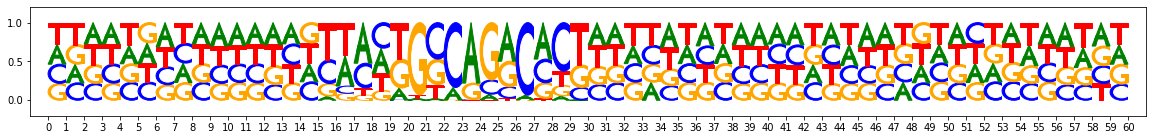

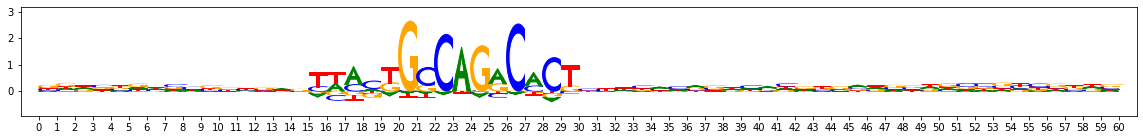

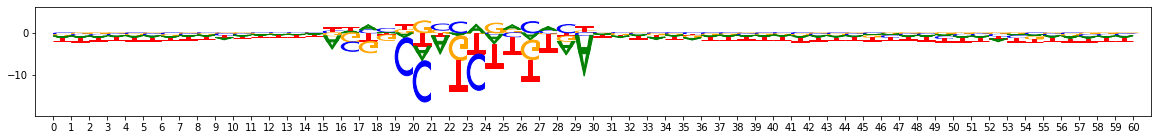

seqlets: 492


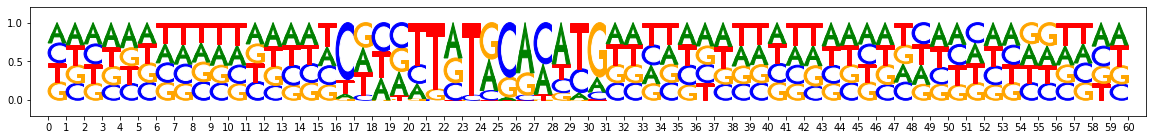

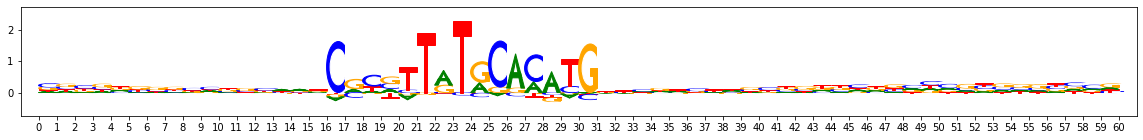

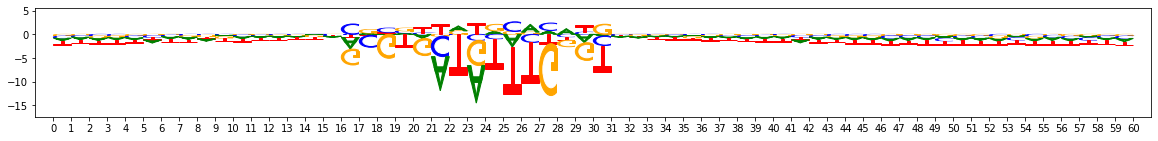

seqlets: 472


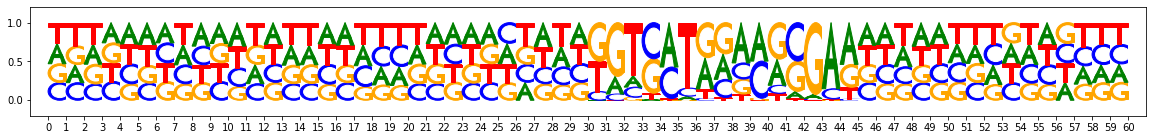

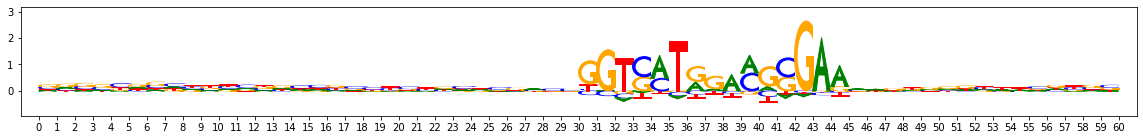

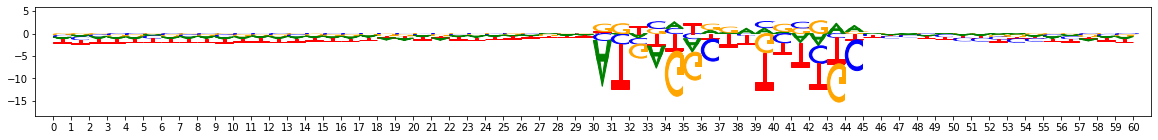

seqlets: 324


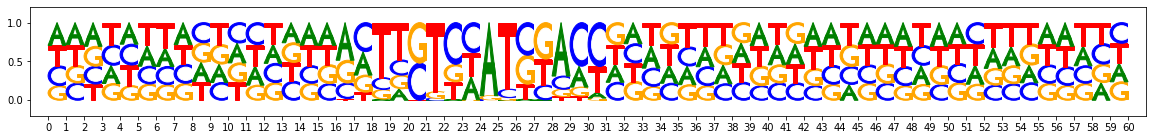

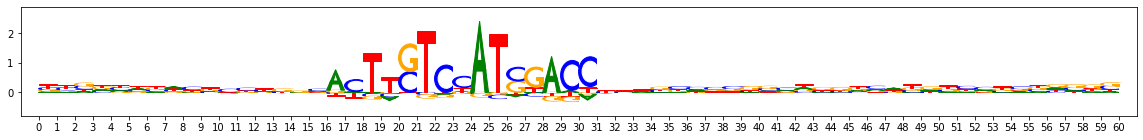

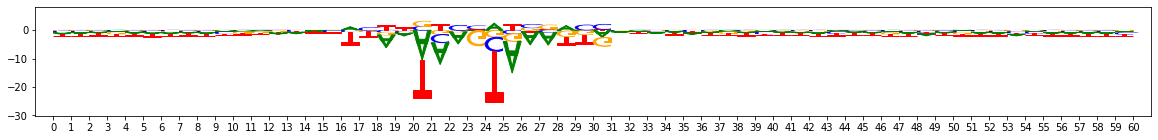

seqlets: 302


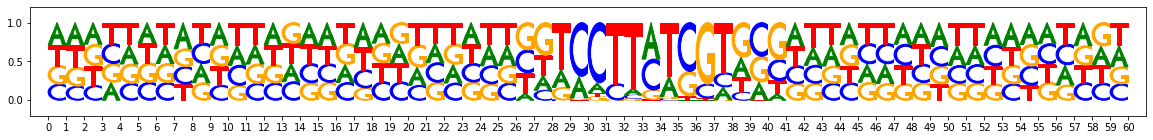

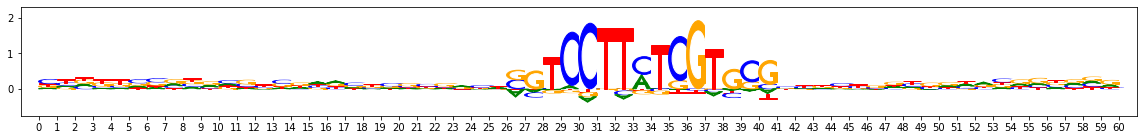

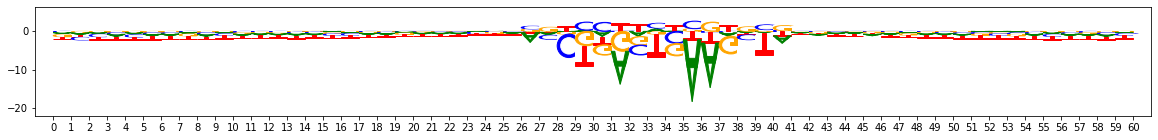

seqlets: 231


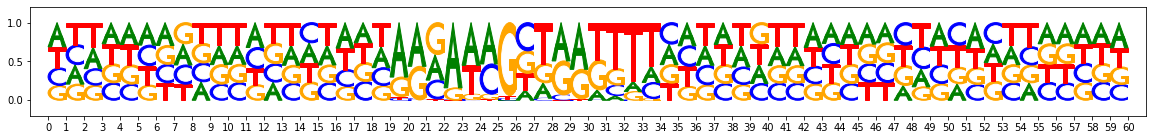

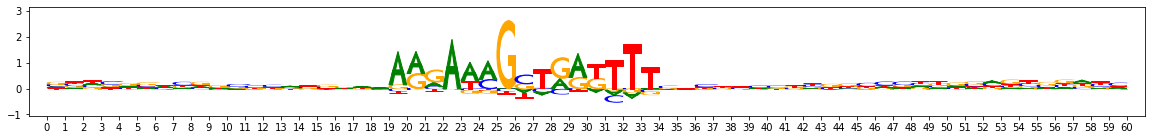

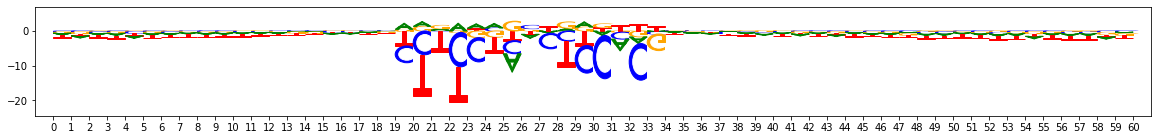

seqlets: 37


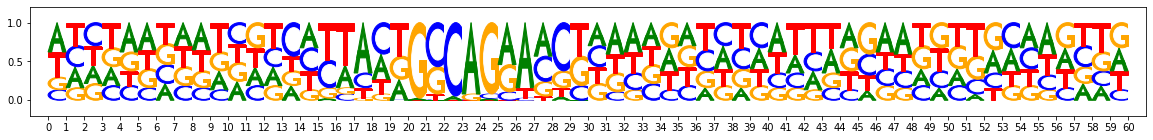

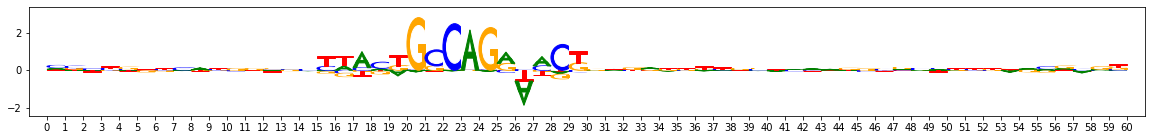

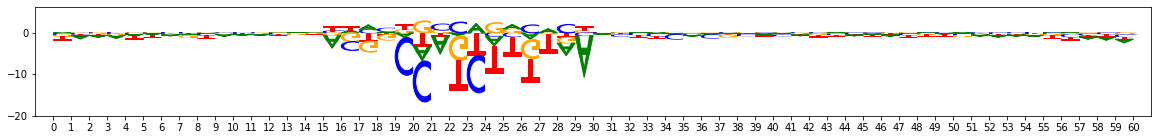

In [64]:
for patternidx,pattern in enumerate(patterns):
  print("seqlets:", len(pattern.seqlets))
  viz_sequence.plot_weights(pattern["sequence"].fwd)
  viz_sequence.plot_weights(pattern["task0_contrib_scores"].fwd)
  viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].fwd)


In [62]:
#for pattern in remaining_patterns:
#  print("seqlets:", len(pattern.seqlets))
#  viz_sequence.plot_weights(pattern["sequence"].fwd)
#  viz_sequence.plot_weights(pattern["sequence"].rev)
#  viz_sequence.plot_weights(pattern["task0_contrib_scores"].fwd)
#  viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].fwd
#                            - np.mean(pattern["task0_hypothetical_contribs"].fwd, axis=-1)[:,None])
